In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test_copy=df_test.copy()

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#We observed that columns Age,Embarked and Cabin have null values.

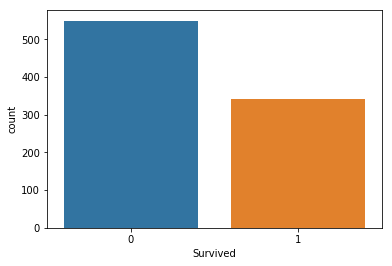

In [10]:
sns.countplot(x='Survived',data=df_train)

In [11]:
# We observe that less people survived.
## Now let us examine all the features one by one.
## Come, let's examine Pclass.

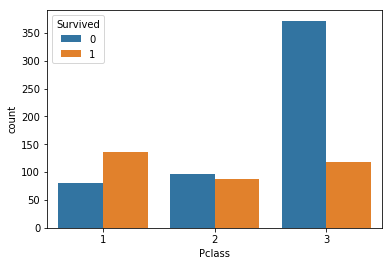

In [12]:
sns.countplot(x='Pclass',data=df_train,hue='Survived')

In [13]:
## On examining the chart above, wer can clearly say that people belonging to third class died in large numbers.

In [14]:
## Come, let's examine Sex column.

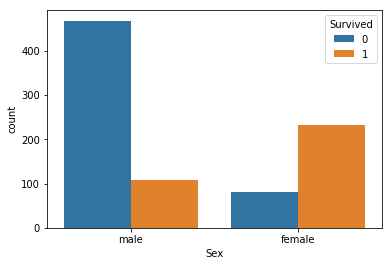

In [15]:
sns.countplot(x='Sex',data=df_train,hue='Survived')

In [16]:
## On examining the chart above, we can clearly say that male are more likely to die in comparision to female.

In [17]:
## Come, let's examine Age.
## We have noticed earlier that column Age has some null values.
## So. first we will complete the Age column and then we will analyze it.


In [18]:
df_train.groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [19]:
def fill_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        
        return Age

In [20]:
df_train['Age'] = df_train[['Age','Pclass']].apply(fill_age,axis=1)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


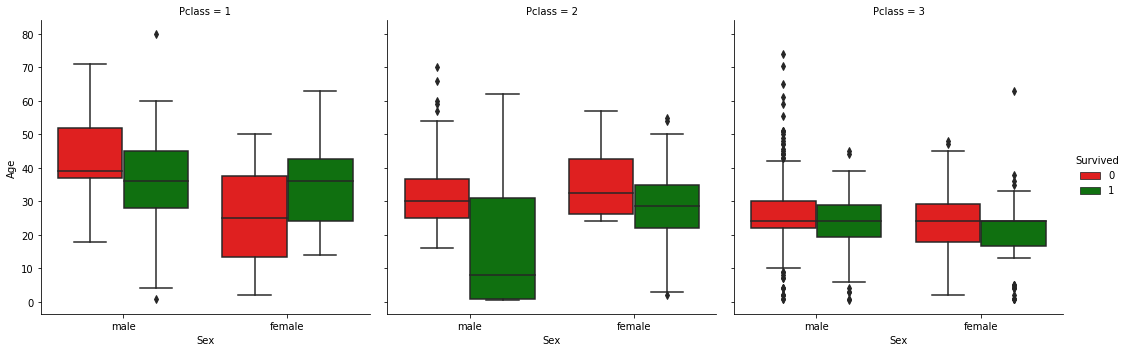

In [21]:
sns.factorplot(x='Sex',y='Age' , col='Pclass', data=df_train , hue='Survived' , kind = 'box', palette=['r','g'])

In [22]:
## Now. let us examine Fare class.

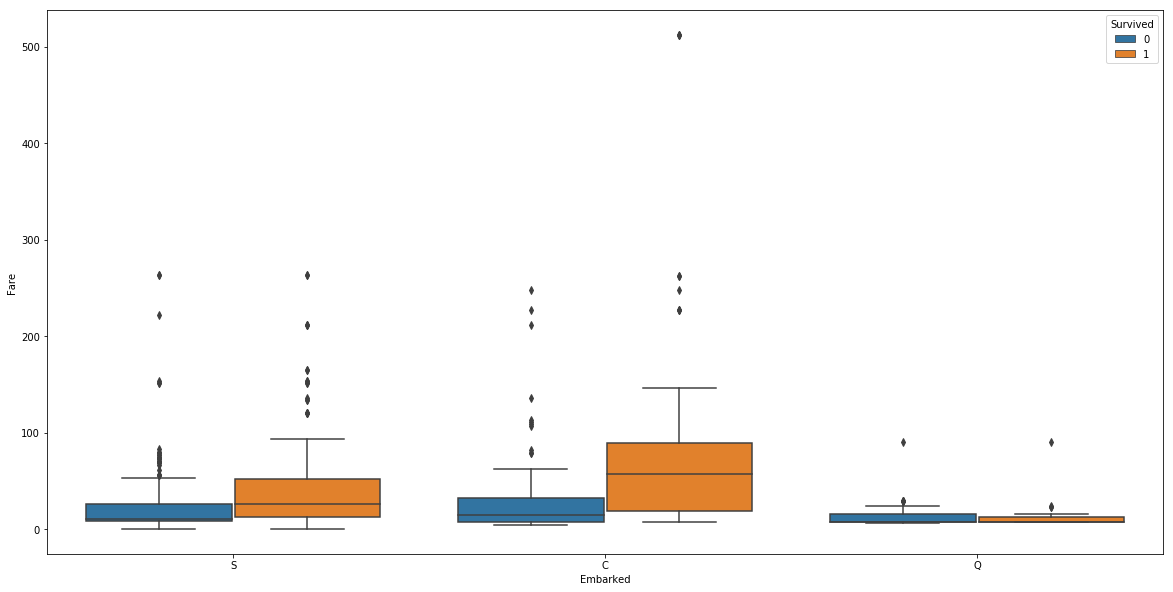

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Embarked',y='Fare',data=df_train,hue='Survived')

In [24]:
## We observe that people who paid more are more likely to survive.
## Now let us examine Embarked column.

In [25]:
## First we need to fill the missing values.

In [26]:
df_train['Embarked'].mode()[0]

'S'

In [27]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0] ,inplace=True)

In [28]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
## Since Cabin has so many missing value, we will remove that column.

In [30]:
df_train.drop('Cabin',axis=1,inplace=True)

In [31]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

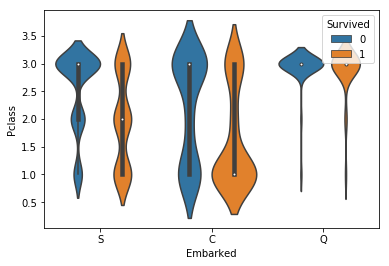

In [32]:
sns.violinplot(x='Embarked' , y='Pclass' , data=df_train , hue='Survived' )

In [33]:
## We can see that those who embarked at C with First Class ticket had a good chance of Survival. Whereas for S, it seems that all classes had nearly equal probability of 
## Survival. And for Q, third Class seems to have Survived and Died with similar probabilities.

In [34]:
## Now lets analyze SibSp column.

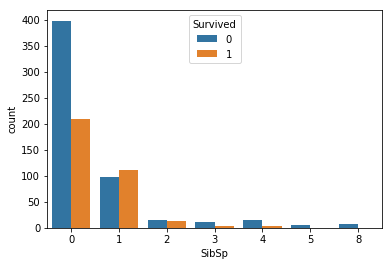

In [35]:
sns.countplot(data=df_train,x='SibSp',hue='Survived')

In [36]:
df_train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [37]:
## It seems that there individuals having 1 or 2 siblings/spouses had the highest Probability of Survival, followed by individuals who were Alone.

In [38]:
## Now lets analyze Parch column.

In [39]:
df_train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [40]:
## It seems that individuals with 1,2 or 3 family members had a greater Probability of Survival, followed by individuals who were Alone.

In [41]:
## Now let us perform some feature engineering to get informative and valuable attributes.

In [42]:
## Now let us create an attribute 'Alone' so that we could know whether the passenger is travelling alone or not.

In [43]:
df_train['Alone'] = 0
df_train.loc[(df_train['SibSp']==0) & (df_train['Parch']==0) , 'Alone'] = 1

df_test['Alone'] = 0
df_test.loc[(df_test['SibSp']==0) & (df_test['Parch']==0) , 'Alone'] = 1

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [45]:
## Now we are going to drop features which are not contributing much.

In [46]:
## Names, PassengerId and Ticket Number doesn't help in finding Probability of Survival
## we have created Alone feature and therefore I'll be Dropping SibSp and Parch

In [47]:
drop_features = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' ]

df_train.drop(drop_features , axis=1, inplace = True)

In [48]:
drop_featuress = ['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket','Cabin' ]

df_test.drop(drop_featuress , axis=1 , inplace = True)

In [49]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [50]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,0


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
Fare        417 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [52]:
## We have a few Null values in Test (Age , Fare) , let's fill it up.

In [53]:
df_test['Fare'].fillna(df_test['Fare'].median() , inplace=True)

In [55]:
df_test.groupby('Pclass').median()

,Age,Fare,Alone
Pclass,,,
1,42.0,60.0000,0
2,26.5,15.7500,1
3,24.0,7.8958,1


In [56]:
def fill_ages(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        
        elif Pclass == 2:
            return 26.5
        
        else:
            return 24
        
    else:
        
        return Age

In [57]:
df_test['Age'] = df_test[['Age','Pclass']].apply(fill_ages,axis=1)

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null object
Alone       418 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [59]:
## Lets convert categorical feature into numerical value.

In [60]:
def map_all(frame):
    
    frame['Sex'] = frame.Sex.map({'female': 0 ,  'male': 1}).astype(int)
    
    
    frame['Embarked'] = frame.Embarked.map({'S' : 0 , 'C': 1 , 'Q':2}).astype(int)
    
    
    
    frame.loc[frame.Age <= 16 , 'Age'] = 0
    frame.loc[(frame.Age >16) & (frame.Age<=32) , 'Age'] = 1
    frame.loc[(frame.Age >32) & (frame.Age<=48) , 'Age'] = 2
    frame.loc[(frame.Age >48) & (frame.Age<=64) , 'Age'] = 3
    frame.loc[(frame.Age >64) & (frame.Age<=80) , 'Age'] = 4
    
    
    frame.loc[(frame.Fare <= 7.91) , 'Fare'] = 0
    frame.loc[(frame.Fare > 7.91) & (frame.Fare <= 14.454) , 'Fare'] = 1
    frame.loc[(frame.Fare > 14.454) & (frame.Fare <= 31) , 'Fare'] = 2
    frame.loc[(frame.Fare > 31) , 'Fare'] = 3

In [61]:
map_all(df_train)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,1.0,0.0,0,0
1,1,1,0,2.0,3.0,1,0
2,1,3,0,1.0,1.0,0,1
3,1,1,0,2.0,3.0,0,0
4,0,3,1,2.0,1.0,0,1


In [62]:
map_all(df_test)
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,3,1,2.0,0.0,2,1
1,3,0,2.0,0.0,0,0
2,2,1,3.0,1.0,2,1
3,3,1,1.0,1.0,0,1
4,3,0,1.0,1.0,0,0


In [63]:
## Now lets apply some model.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(df_train.drop('Survived',axis=1),df_train.Survived,test_size=0.20,random_state=66)

In [66]:
models = [LogisticRegression(),RandomForestClassifier(),
        DecisionTreeClassifier()]

model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']

accuracy = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    accuracy.append(accuracy_score(pred , y_test))
    
compare = pd.DataFrame({'Algorithm' : model_names , 'Accuracy' : accuracy})
compare

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Algorithm,Accuracy
0,LogisticRegression,0.759777
1,RandomForestClassifier,0.810056
2,DecisionTree,0.826816


In [67]:
## We get highest accuracy for DecisionTreeClassifier

In [68]:
## Now lets try to tune parameter

In [69]:
params_dict={'criterion':['gini','entropy'],'max_depth':[5.21,5.22,5.23,5.24,5.25,5.26,5.27,5.28,5.29,5.3]}
clf_dt=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_dict,scoring='accuracy', cv=5)
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))
print(clf_dt.best_params_)

0.8379888268156425
{'criterion': 'gini', 'max_depth': 5.22}


In [ ]:
predio = clf_dt.predict(df_test)

d = {'PassengerId' : df_test_copy.PassengerId , 'Survived' : predio}
answer = pd.DataFrame(d)
answer.to_csv('predio.csv' , index=False)